Задание
1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

### Задание 1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

Задание 1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени - это временной ряд,потому что цена привязана ко времени.

б) скорость полета самолета при перелете из аэропорта А в аэропорт В, это тоже временной ряд, самолет перемещается во времени, и скорость измеряется в разные моменты времени.

в) количество отказов компьютера- это не временной ряд, если бы отказы измерялись с привязкой ко времени суток, или к возрасту компьютера, то ряд был бы временной.

г) число обращений в поликлинику по району- не временной ряд, если бы была, к примеру, привязка к сезону, можно было бы назвать данные временным рядом.

д) координаты автобуса при движении по маршруту- временной ряд, потому что координаты изменяются и измеряются с привязкой ко времени.

е) координаты фигуры нарушителя в файле видеофиксации охранной системы- координаты в видео измеряются во времени при перемещении нарушителя, это временной ряд.

### 2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

ИТОГИ: В исследуемом датасете представлены данные по потреблению электроэнергии за 2005-2018 годы, данные имеют циклический характер, потребление изменяется в зависимости от сезона. Выбросов в датасете не обнаружено, максимумы и минимумы потребления не выбиваются из общей картины. В датасете были пропущенные данные по четырем дням, а также задвоенные в таком же количестве, что связано с переходом на зимнее-летнее время. Кроме того, нарушен порядок внесения данных из-за реверсивного способа записи. Эти особенности были исправлены.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Это числовой временной ряд, данные содержат 119068 измерений.

In [6]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

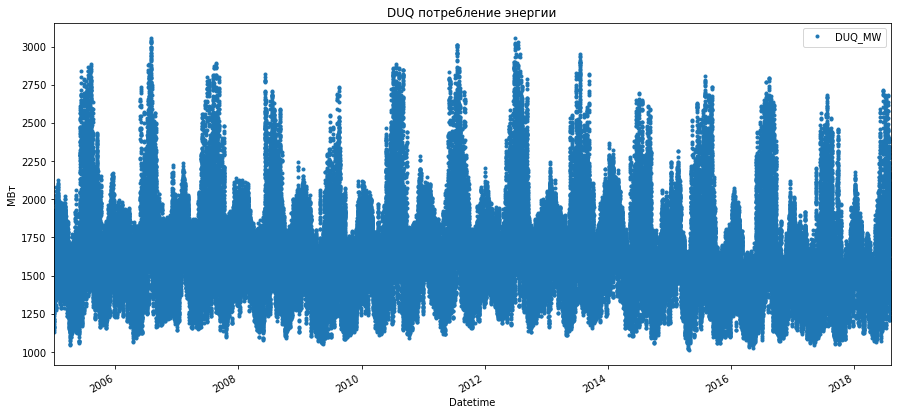

In [7]:
#строим график:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

Видим цикличное изменение потребления электроэнергии без видимых выбросов. Посмотрим на минимумы и макисмумы потреблений поближе:

In [8]:
data.nlargest(5, "DUQ_MW")

,DUQ_MW
Datetime,
2012-06-29 14:00:00,3054.0
2006-08-03 16:00:00,3053.0
2006-08-03 17:00:00,3046.0
2006-08-02 17:00:00,3035.0
2012-07-17 18:00:00,3029.0


In [9]:
data.nsmallest(10, "DUQ_MW")

,DUQ_MW
Datetime,
2015-04-27 06:00:00,1014.0
2015-04-19 06:00:00,1020.0
2015-04-19 04:00:00,1024.0
2015-04-19 05:00:00,1025.0
2016-05-08 05:00:00,1028.0
2016-04-17 05:00:00,1036.0
2015-04-19 03:00:00,1039.0
2016-04-17 04:00:00,1039.0
2016-05-08 04:00:00,1043.0


Здесь видим, что наименьшее потребление несколько раз зафиксировано в апреле 2015 года, приблизим этот период:

In [10]:
data['date'] = data.index
data_2015 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2015 , data['date'].dt.month == 4), data['date'].dt.day > 1  )]

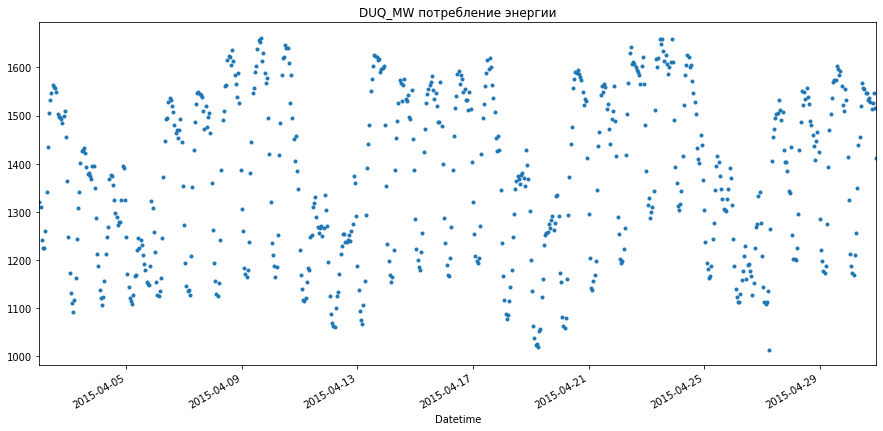

In [11]:
_ = data_2015['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW потребление энергии' )

Хотя потребление здесь минимально за историю наблюдений, визуально не бросается в глаза никаких аномалий.

Теперь сопоставим число наблюдений и число уникальных значений по аналогии с разбором на уроке.

In [12]:
data['date'] = data.index
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])
count_data = data['date'].value_counts()
count_data.head()

число уникальных значений:    119064  : число наблюдений :  119068


2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

видим такие же результаты, задвоенные даты в связи с переводом времени. Найдем отсутствующие даты:

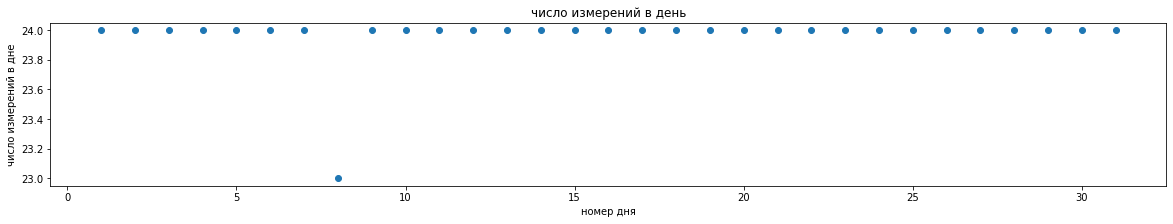

In [13]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Text(0.5, 1.0, 'потребление энергии 8 марта 2015')

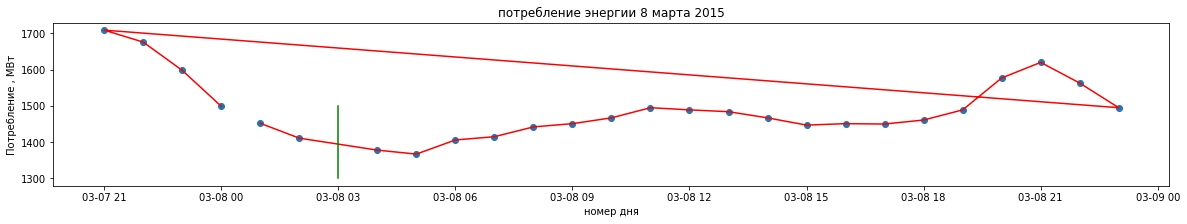

In [14]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1300,1500]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')


Исправим пропущенные данные и удалим задвоенные:

In [15]:
day_H=data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [16]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 =Day_count[Day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [17]:
day_H=data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 =Day_count[Day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [18]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2017 =Day_count[Day_count != 24].index
d2017

Int64Index([12], dtype='int64')

In [19]:
v1 = list((data['2014-03-09 02:00:00']['DUQ_MW'].values + data['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
v2 = list((data['2015-03-08 02:00:00']['DUQ_MW'].values + data['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((data['2016-03-13 02:00:00']['DUQ_MW'].values + data['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((data['2017-03-12 02:00:00']['DUQ_MW'].values + data['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v1[0]

1415.0

In [20]:
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))

In [21]:
df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v)
df_data['date'] = df_data.index
df_data.head()
#
data = data.append(df_data,sort = False)
data.tail()

,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


In [22]:
df = data.loc[count_data.iloc[:4].index]
df_ = df.groupby('date').mean()
df_['date'] = df_.index

In [23]:
data = data.drop(count_data.iloc[:4].index)

In [24]:
data = data.append(df_,sort = False)
data.tail(10)

,DUQ_MW,date
2018-01-01 23:00:00,1820.0,2018-01-01 23:00:00
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


Из предыдущих графиков видим, что порядок внесения данных нарушен, исправим это сортировкой по индексу

In [25]:
data = data.sort_index()

Text(0.5, 1.0, 'потребление энергии 8 марта 2015')

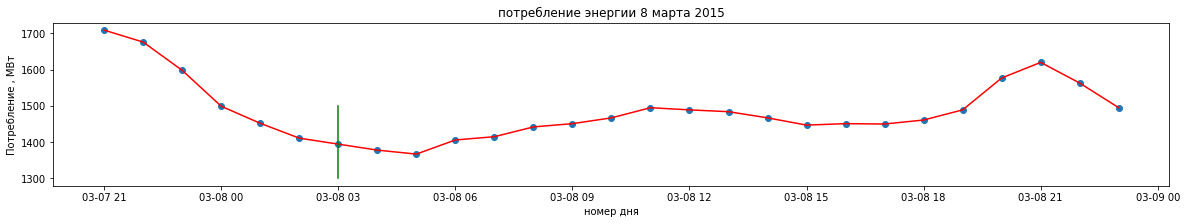

In [26]:
#проверим:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1300,1500]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')


In [27]:
data['date'] = data.index
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119068  : число наблюдений :  119068


Исправлены задвоенные и пропущенные даты и порядок, в котором расположены данные.

ИТОГИ: В исследуемом датасете представлены данные по потреблению электроэнергии за 2005-2018 годы, данные имеют циклический характер, потребление изменяется в зависимости от сезона. Выбросов в датасете не обнаружено, максимумы и минимумы потребления не выбиваются из общей картины. В датасете были пропущенные данные по четырем дням, а также задвоенные в таком же количестве, что связано с переходом на зимнее-летнее время. Кроме того, нарушен порядок внесения данных из-за реверсивного способа записи. Эти особенности были исправлены.

### 3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [28]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_datam = brent_data.resample("M").mean() # представление по месяцам
brent_dataw = brent_data.resample("W").mean() # представление по неделям

Text(0.5, 0, 'weeks')

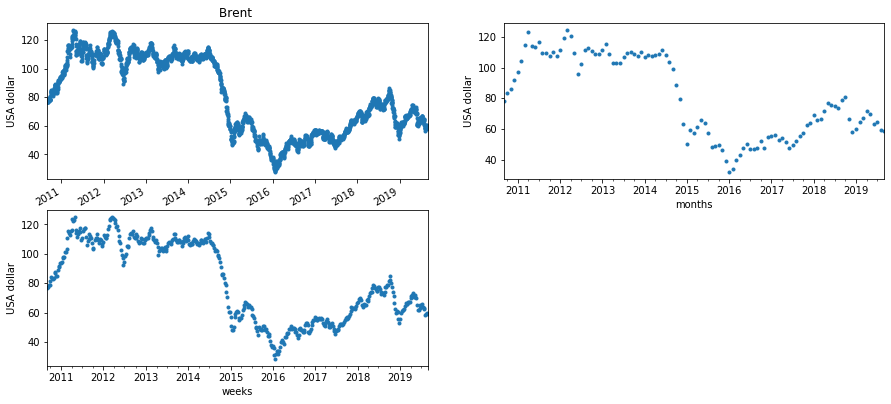

In [29]:
# построим графики представления данных по дням, месяцам и неделям:
plt.figure(figsize=(25,6))
plt.subplot(2,2,1)
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('days')

plt.subplot(2,2,2)
_ = brent_datam['Значение'].plot( style='.', figsize=( 15, 7 ))
plt.ylabel('USA dollar')
plt.xlabel('months')

plt.subplot(2,2,3)
_ = brent_dataw['Значение'].plot( style='.', figsize=( 15, 7 ))
plt.ylabel('USA dollar')
plt.xlabel('weeks')

### 4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [30]:
# графики изменения среднего по выборке построены в предыдущем задании, среднее отклонение посчитаем ниже:
brent_dataw_st = brent_data.resample("W").std()
brent_datam_st = brent_data.resample("M").std()
brent_datay_st = brent_data.resample("Y").std()
brent_datay_st

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923
2015-12-31,7.925983
2016-12-31,6.795158
2017-12-31,4.876939
2018-12-31,6.866875


Text(0.5, 0, 'years')

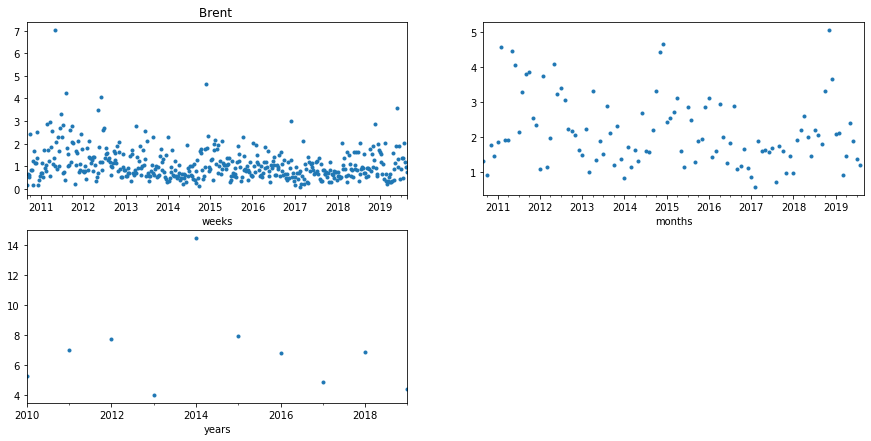

In [31]:
# теперь построим графики изменения среднего квадратичного отклонения в представлении по неделям, месяцам и годам:

plt.figure(figsize=(25,6))
plt.subplot(2,2,1)
_ = brent_dataw_st['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
#plt.ylabel('USA dollar')
plt.xlabel('weeks')

plt.subplot(2,2,2)
_ = brent_datam_st['Значение'].plot( style='.', figsize=( 15, 7 ))
#plt.ylabel('USA dollar')
plt.xlabel('months')

plt.subplot(2,2,3)
_ = brent_datay_st['Значение'].plot( style='.', figsize=( 15, 7 ))
#plt.ylabel('USA dollar')
plt.xlabel('years')


### 5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Из графиков изменения отклонения видны периоды наиболее резкого изменения цены на нефть. В представлении по годам видно, что больше всего изменились цены в 2014 году, график по неделям указывает нам н неделю в начале 2011 года, график по месяцам показывает на самое резкое изменение в конце 2018 года. Посмотрим графики на эти периоды.

In [65]:
brent_dataw_st.nlargest(3,'Значение')

,Значение
Дата,
2011-05-08,7.021247
2014-11-30,4.634907
2011-08-07,4.260227


In [63]:
brent_data['date'] = brent_data.index
data_2011 = brent_data.loc[np.logical_and( np.logical_and( brent_data['date'].dt.year == 2011 , data['date'].dt.month == 5), data['date'].dt.day < 15  )]

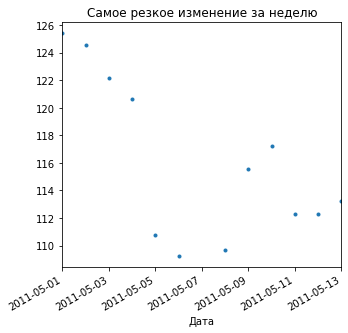

In [66]:
_ = data_2011['Значение'].plot( style='.', figsize=( 5, 5 ), title='Самое резкое изменение за неделю' )

In [35]:
brent_datam_st.nlargest(5,'Значение')

,Значение
Дата,
2018-11-30,5.049615
2014-12-31,4.642352
2011-02-28,4.567321
2011-05-31,4.445148
2014-11-30,4.415304


In [60]:
data_2018 = brent_data.loc[(brent_data['date'].dt.year == 2018) & (brent_data['date'].dt.month == 11)]

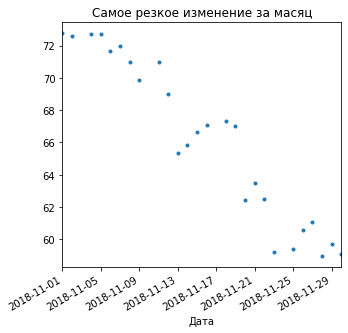

In [67]:
_ = data_2018['Значение'].plot( style='.', figsize=( 5, 5 ), title='Самое резкое изменение за месяц' )

Видим, что снижение за неделю в 2011 году произошло из-за какого-то события, но сразу было отыграно обратно. В 2018 году значительное снижение происходило минимум месяц. В представлении по годам ожидаемо самое большое изменение было в 2014 году.